### Ordinary derivative of the function

- The definition of the derivative of the function **f** at the point **x**.
- Represents the limit of the average rate of change (or average slope) of the function as the interval
h approaches zero.
- The process of finding this limit is known as differentiation
- Limit, if it exists, gives you the instantaneous rate of change of the function at **x**
- The process of finding this limit is known as differentiation.


![derivative](./img/derivative_of_the%20function.png)


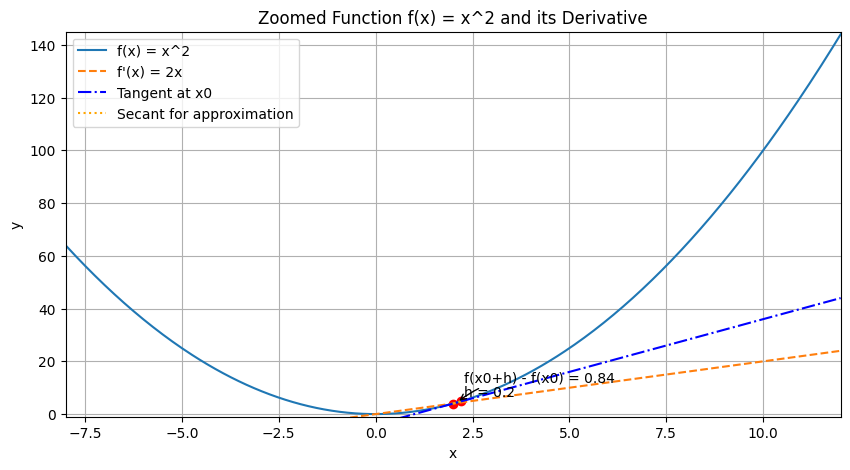

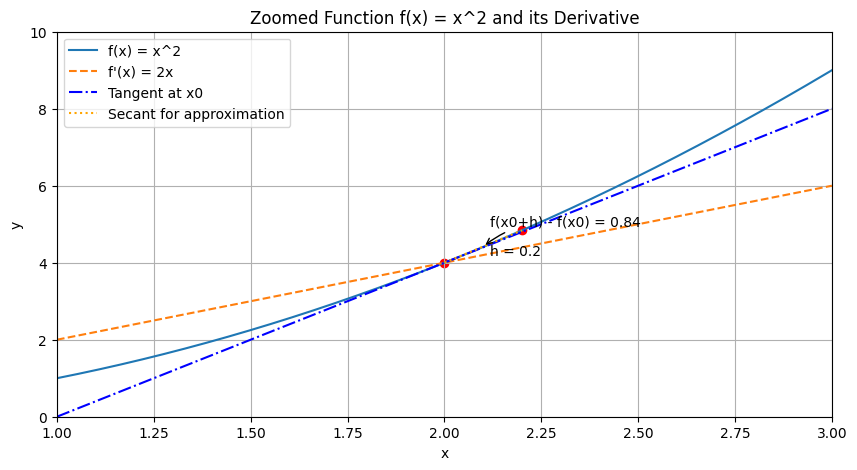

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def quadratic_fun(x):
    return x ** 2

# Define the actual derivative of the function using the Power Rule.
# For f(x) = x^2, the derivative f'(x) = 2x.
def actual_derivative_quad_fun(x):
    return 2 * x

# Define the derivative using the limit definition.
# This function approximates the derivative numerically using a small h value.
# It applies the difference quotient method to estimate the slope (derivative)
# of the function f at a specific point x.
def approximate_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h



def plot_function_and_derivative_zoomed(f, actual_derivative, approx_deriv, x0, h, zoom_factor):
    

    # Generate x values around x0
    x = np.linspace(x0 - zoom_factor, x0 + zoom_factor, 400)
    y = f(x)
    dy = actual_derivative(x)
    
    # Compute the tangent line at x0
    tangent_actual = actual_derivative(x0) * (x - x0) + f(x0)
    
    # Compute the secant line for the approximate derivative
    secant_x = np.array([x0, x0 + h])
    secant_y = f(secant_x)
    
    # Plot the function, derivative, and tangent line
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, label='f(x) = x^2')
    plt.plot(x, dy, label="f'(x) = 2x", linestyle='--')
    plt.plot(x, tangent_actual, label="Tangent at x0", linestyle='-.', color='blue')
    plt.plot(secant_x, secant_y, label="Secant for approximation", linestyle=':', color='orange')
    
    # Highlight the points used for the secant line
    plt.scatter(secant_x, secant_y, color='red')
    
    # Annotate the distance on x and y axis for the secant line
    plt.annotate(f'h = {h}',
                 xy=(x0 + h/2, f(x0)), xycoords='data',
                 xytext=(5, 5), textcoords='offset points')
    plt.annotate(f'f(x0+h) - f(x0) = {f(x0 + h) - f(x0):.2f}',
                 xy=((x0 + x0 + h)/2, (f(x0) + f(x0 + h))/2), xycoords='data',
                 xytext=(5, 15), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.title("Zoomed Function f(x) = x^2 and its Derivative")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # Adjust the limits based on the zoom factor
    plt.xlim(x0 - zoom_factor, x0 + zoom_factor)
    plt.ylim(min(y) - 1, max(y) + 1)
    
    plt.show()

approx_deriv = approximate_derivative(f, x0, h)
x0 = 2 # Point at which we want to calculate the derivative
h = 0.2 #can be limit 

zoom_factor = 0.5  # Determines how much to zoom out
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=10)
plot_function_and_derivative_zoomed(quadratic_fun, actual_derivative_quad_fun, approx_deriv, x0, h, zoom_factor=1)


### Gradient descent for simple Linear Regression with ordinary derivative

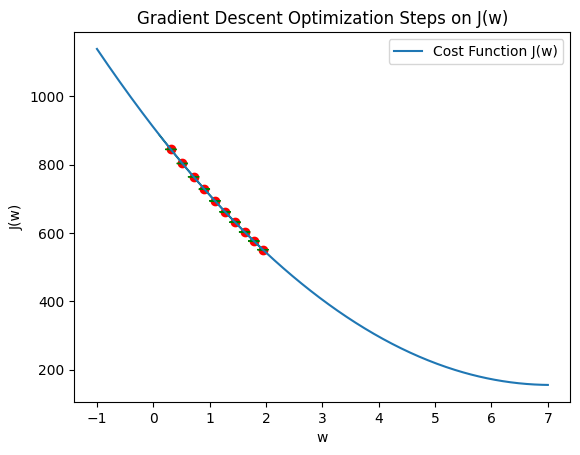

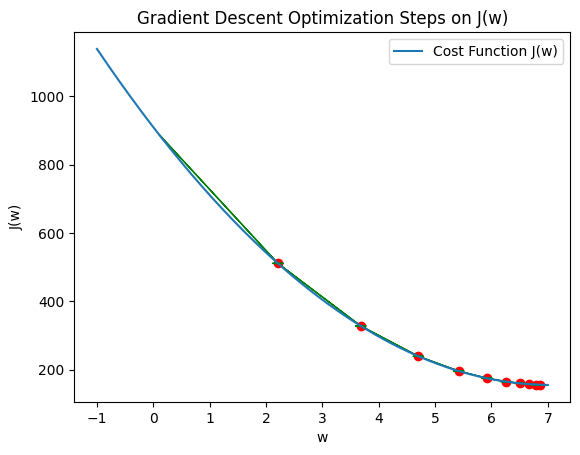

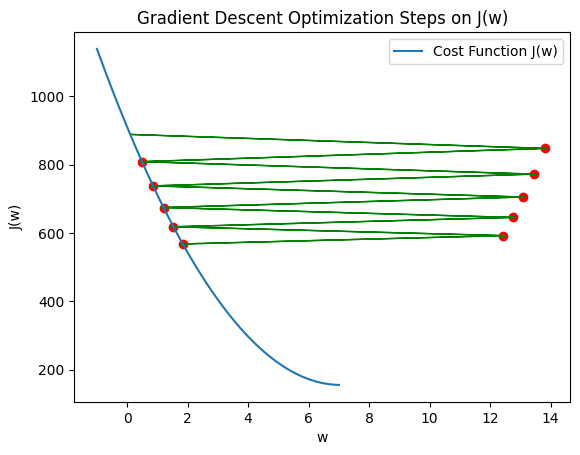

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
y = np.array([2, 4, 8, 16, 32, 64])
x = np.array([1, 2, 3, 4, 5, 6])
n = len(x)

# Function to calculate MSE
def calculate_mse(w, x, y):
    predictions = w * x
    mse = np.mean((predictions - y) ** 2)
    return mse

# Function to calculate the derivative of MSE with respect to w
def calculate_derivative(w, x, y):

    # Step 0: 
    # The errors are calculated as the difference between the predicted values and the actual values.
    # Predicted values are obtained by multiplying the current model parameter 'w' with the input 'x'.
    errors = w * x - y  # errors = [w * x1 - y1, w * x2 - y2, ..., w * xn - yn]

    # Step 1:
    #  Multiply each error with its corresponding x value
    product_of_errors_and_x = errors * x  # [error_1 * x_1, error_2 * x_2, ..., error_n * x_n]

    # Step 2:
    #  Sum the products
    sum_of_products = np.sum(product_of_errors_and_x)  # Sum([error_1 * x_1 + error_2 * x_2 + ... + error_n * x_n])

    # Step 3:
    #  Multiply the sum by 2/n (Normalization and considering squared error)
    derivative = (2 / n) * sum_of_products  # (2/n) * Sum([error_1 * x_1 + error_2 * x_2 + ... + error_n * x_n])

    return derivative


# Plotting function
def plot_gradient_descent(w_history, mse_history):
    # Plot the cost function J(w) with respect to w
    weights = np.linspace(-1, 7, 400)
    costs = np.array([calculate_mse(w_val, x, y) for w_val in weights])
    plt.plot(weights, costs, label='Cost Function J(w)')

    # Plot the optimization steps with arrows
    for i in range(1, len(w_history)):
        plt.scatter(w_history[i], mse_history[i], color='red')  # Red dot at each w
        plt.arrow(w_history[i-1], mse_history[i-1], 
                  w_history[i] - w_history[i-1], 
                  mse_history[i] - mse_history[i-1], 
                  head_width=0.2, head_length=0.3, fc='green', ec='green')

    plt.xlabel('w')
    plt.ylabel('J(w)')
    plt.title('Gradient Descent Optimization Steps on J(w)')
    plt.legend()
    plt.show()

# Perform gradient descent and collect the history of w and MSE
def gradient_descent(x, y, starting_w=0.1, learning_rate=0.000001, steps=10):
    w = starting_w
    w_history = [w]
    mse_history = [calculate_mse(w, x, y)]
    
    for step in range(steps):
        gradient = calculate_derivative(w, x, y)
        w -= learning_rate * gradient  # Update the weight
        
        # Record the history
        w_history.append(w)
        mse_history.append(calculate_mse(w, x, y))
    
    return w_history, mse_history

# Run gradient descent


w_history_small_learn_rate, mse_history_1 = gradient_descent(x, y, learning_rate=0.001, steps=10)
w_history_normal_learn_rate, mse_history_2 = gradient_descent(x, y, learning_rate=0.01, steps=10)
w_history_big_learn_rate, mse_history_3 = gradient_descent(x, y, learning_rate=0.065, steps=10)

# Plot the gradient descent steps
plot_gradient_descent(w_history_small_learn_rate, mse_history_1)
plot_gradient_descent(w_history_normal_learn_rate, mse_history_2)
plot_gradient_descent(w_history_big_learn_rate, mse_history_3)
